In [1]:
import numpy as np 
import pandas as pd 
import librosa
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import os


In [2]:
data_dir = "donateacry_corpus"
categories = ["belly_pain", "burping", "discomfort", "hungry", "tired"]

In [3]:
data = []
labels = []

# Load audio data and label
def load_audio_data(data_dir, categories):
    for label, category in enumerate(categories):
        category_path = os.path.join(data_dir, category)
        for file_name in os.listdir(category_path):
            file_path = os.path.join(category_path, file_name)
            try:
                # Load audio file and extract MFCC features
                audio, sr = librosa.load(file_path, sr=None)
                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
                mfcc_scaled = np.mean(mfcc.T, axis=0)  # Take the mean across time
                data.append(mfcc_scaled)
                labels.append(label)
            except Exception as e:
                print(f"Error loading {file_name}: {e}")

In [4]:
load_audio_data(data_dir, categories)

# Convert data to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

# Normalize the data
X_train = X_train / np.max(np.abs(X_train))
X_test = X_test / np.max(np.abs(X_test))
X_train = X_train.reshape(-1, 40, 1)
X_test = X_test.reshape(-1, 40, 1)

Total audio files loaded: 457
Labels distribution: [ 16   8  27 382  24]


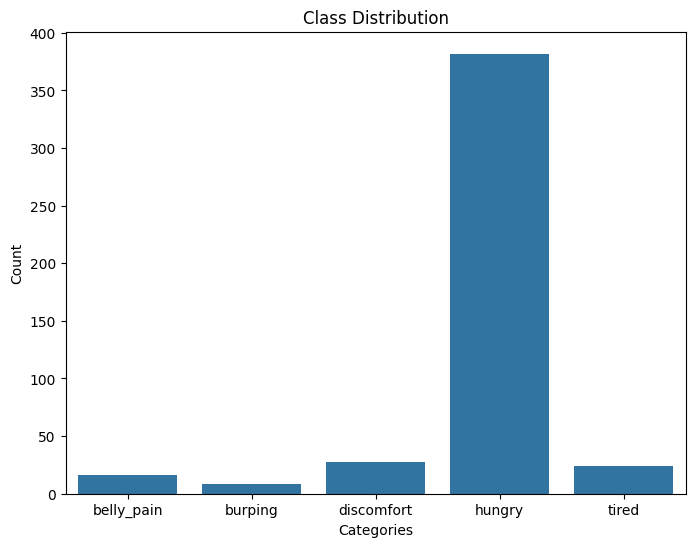

MFCC Shape: (40,)
MFCC Sample Values (first file): [-4.0587601e+02  2.7121643e+01 -4.2248203e+01 -3.4693772e-01
 -3.3404629e+01  4.6658282e+00 -1.7678110e+01  2.7751896e+00
 -8.6596804e+00 -9.6399546e+00 -9.5288858e+00  2.9254959e+00
  1.2073723e+01  7.5435691e+00 -1.9964361e+00 -4.6856375e+00
  2.1049182e+00 -5.0411439e+00 -1.0903169e+01 -3.5849791e+00
 -1.3487380e+00 -8.4511824e+00 -3.3052751e-01  6.8509665e+00
  4.5105442e-01  6.7609906e-01 -1.3546180e+00 -7.2853537e+00
 -2.9930413e-01 -9.2470086e-01 -3.6898115e+00 -2.0762713e+00
 -3.6989164e+00 -2.1250067e+00 -4.4013705e+00  7.3043004e-02
  2.5430689e-02 -3.0180986e+00 -2.7590559e+00 -2.8029234e+00]


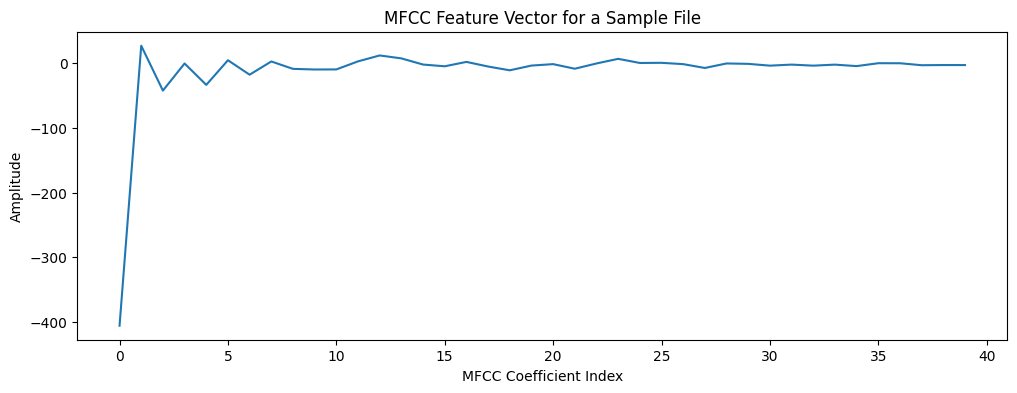

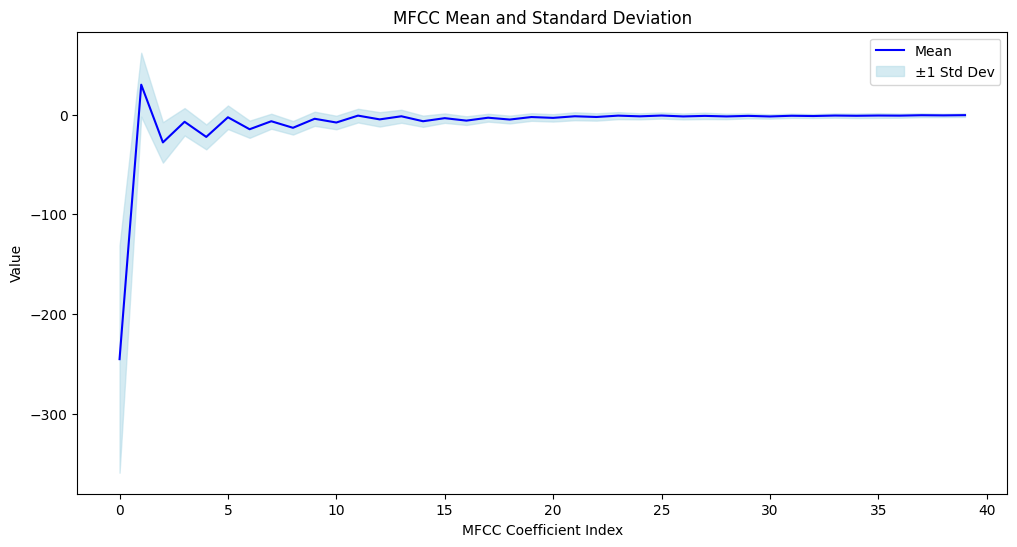

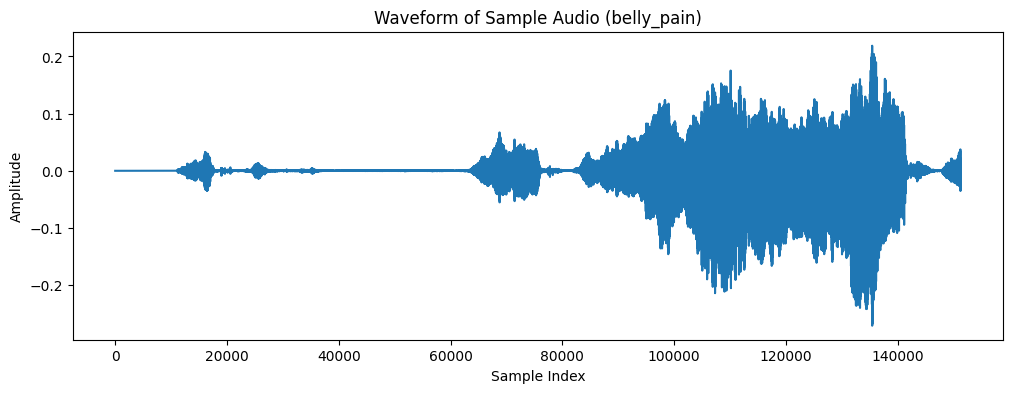

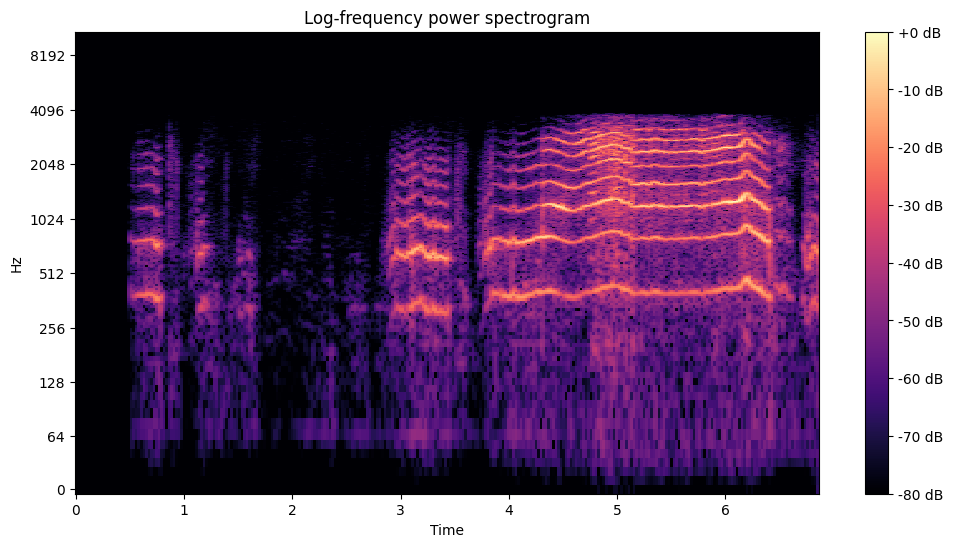

Data Range after Normalization: Min = -1.0, Max = 0.21320471167564392


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset Overview
print(f"Total audio files loaded: {len(data)}")
print(f"Labels distribution: {np.bincount(labels)}")

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=[categories[label] for label in labels])
plt.title("Class Distribution")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

# 2. MFCC Feature Analysis
# Example: Inspect the first MFCC feature vector
mfcc_sample = data[0]
print(f"MFCC Shape: {mfcc_sample.shape}")
print(f"MFCC Sample Values (first file): {mfcc_sample}")

# Plot MFCC values for the first file
plt.figure(figsize=(12, 4))
plt.plot(mfcc_sample)
plt.title("MFCC Feature Vector for a Sample File")
plt.xlabel("MFCC Coefficient Index")
plt.ylabel("Amplitude")
plt.show()

# 3. Distribution of MFCC Features
mfcc_mean = np.mean(data, axis=0)
mfcc_std = np.std(data, axis=0)

# Plot mean and std of MFCC features
plt.figure(figsize=(12, 6))
plt.plot(mfcc_mean, label="Mean", color="blue")
plt.fill_between(range(len(mfcc_mean)), mfcc_mean - mfcc_std, mfcc_mean + mfcc_std, color="lightblue", alpha=0.5, label="±1 Std Dev")
plt.title("MFCC Mean and Standard Deviation")
plt.xlabel("MFCC Coefficient Index")
plt.ylabel("Value")
plt.legend()
plt.show()

# 4. Visualize Audio Sample
# Select a random file from the dataset
sample_index = 0  # Change the index to inspect other files
audio, sr = librosa.load(os.path.join(data_dir, categories[labels[sample_index]], os.listdir(os.path.join(data_dir, categories[labels[sample_index]]))[sample_index]))

# Plot waveform
plt.figure(figsize=(12, 4))
plt.plot(audio)
plt.title(f"Waveform of Sample Audio ({categories[labels[sample_index]]})")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

# Plot spectrogram
plt.figure(figsize=(12, 6))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Log-frequency power spectrogram")
plt.show()

# 5. Check Normalization
print(f"Data Range after Normalization: Min = {np.min(X_train)}, Max = {np.max(X_train)}")


Audio Files Summary:
       Sampling Rate (Hz)  Duration (s)  File Size (KB)
count               457.0    457.000000      457.000000
mean               8000.0      6.918293      108.174503
std                   0.0      0.113685        1.776328
min                8000.0      6.520000      101.951172
25%                8000.0      6.880000      107.576172
50%                8000.0      6.960000      108.826172
75%                8000.0      7.000000      109.451172
max                8000.0      7.060000      110.388672


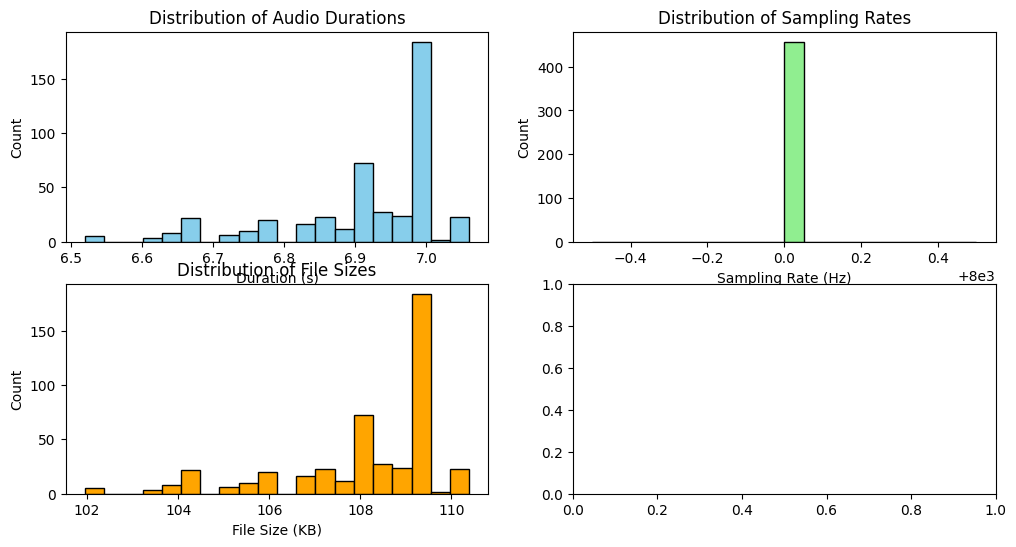

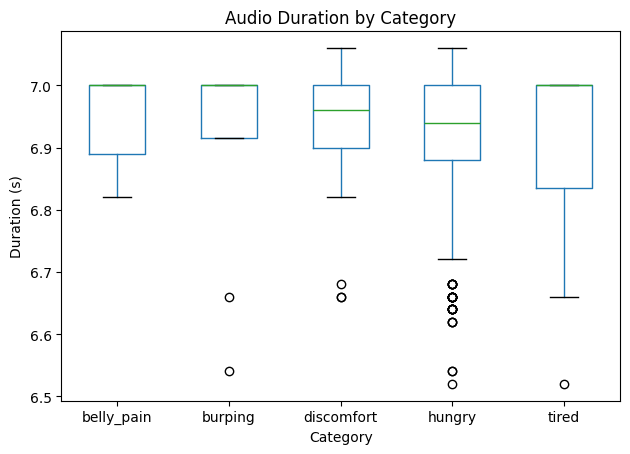

Sample Audio Properties:
                                           File Name    Category  \
0  549a46d8-9c84-430e-ade8-97eae2bef787-143013077...  belly_pain   
1  643D64AD-B711-469A-AF69-55C0D5D3E30F-143013849...  belly_pain   
2  643D64AD-B711-469A-AF69-55C0D5D3E30F-143013850...  belly_pain   
3  643D64AD-B711-469A-AF69-55C0D5D3E30F-143013851...  belly_pain   
4  643D64AD-B711-469A-AF69-55C0D5D3E30F-143013852...  belly_pain   

   Sampling Rate (Hz)  Duration (s)  File Size (KB)  
0                8000          6.86      107.263672  
1                8000          7.00      109.451172  
2                8000          7.00      109.451172  
3                8000          7.00      109.451172  
4                8000          7.00      109.451172  


In [7]:


# Function to get audio details
def analyze_audio_files(data_dir, categories):
    audio_properties = []

    for label, category in enumerate(categories):
        category_path = os.path.join(data_dir, category)
        for file_name in os.listdir(category_path):
            file_path = os.path.join(category_path, file_name)
            try:
                # Load audio file
                audio, sr = librosa.load(file_path, sr=None)
                duration = librosa.get_duration(y=audio, sr=sr)
                file_size = os.path.getsize(file_path) / 1024  # File size in KB
                
                audio_properties.append({
                    "File Name": file_name,
                    "Category": category,
                    "Sampling Rate (Hz)": sr,
                    "Duration (s)": duration,
                    "File Size (KB)": file_size
                })
            except Exception as e:
                print(f"Error processing {file_name}: {e}")
    
    return pd.DataFrame(audio_properties)

# Analyze audio files
audio_df = analyze_audio_files(data_dir, categories)

# Display basic statistics
print("Audio Files Summary:")
print(audio_df.describe())

# Visualize distributions
plt.figure(figsize=(12, 6))

# Distribution of durations
plt.subplot(2, 2, 1)
plt.hist(audio_df["Duration (s)"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Audio Durations")
plt.xlabel("Duration (s)")
plt.ylabel("Count")

# Distribution of sampling rates
plt.subplot(2, 2, 2)
plt.hist(audio_df["Sampling Rate (Hz)"], bins=20, color="lightgreen", edgecolor="black")
plt.title("Distribution of Sampling Rates")
plt.xlabel("Sampling Rate (Hz)")
plt.ylabel("Count")

# Distribution of file sizes
plt.subplot(2, 2, 3)
plt.hist(audio_df["File Size (KB)"], bins=20, color="orange", edgecolor="black")
plt.title("Distribution of File Sizes")
plt.xlabel("File Size (KB)")
plt.ylabel("Count")

# Boxplot for durations grouped by category
plt.subplot(2, 2, 4)
audio_df.boxplot(column="Duration (s)", by="Category", grid=False)
plt.title("Audio Duration by Category")
plt.suptitle("")  # Remove default title
plt.xlabel("Category")
plt.ylabel("Duration (s)")

plt.tight_layout()
plt.show()

# Show the first few rows of the dataframe
print("Sample Audio Properties:")
print(audio_df.head())


In [8]:
# Function to analyze audio properties by category
def analyze_audio_category_wise(data_dir, categories):
    category_details = []

    for category in categories:
        category_path = os.path.join(data_dir, category)
        durations = []
        file_sizes = []
        sampling_rates = []

        for file_name in os.listdir(category_path):
            file_path = os.path.join(category_path, file_name)
            try:
                # Load the audio file
                audio, sr = librosa.load(file_path, sr=None)
                duration = librosa.get_duration(y=audio, sr=sr)
                file_size = os.path.getsize(file_path) / 1024  # File size in KB
                
                # Append details
                durations.append(duration)
                sampling_rates.append(sr)
                file_sizes.append(file_size)
            except Exception as e:
                print(f"Error processing {file_name}: {e}")
        
        # Calculate statistics for the current category
        category_details.append({
            "Category": category,
            "Total Files": len(durations),
            "Mean Duration (s)": np.mean(durations) if durations else 0,
            "Max Duration (s)": np.max(durations) if durations else 0,
            "Min Duration (s)": np.min(durations) if durations else 0,
            "Mean File Size (KB)": np.mean(file_sizes) if file_sizes else 0,
            "Max File Size (KB)": np.max(file_sizes) if file_sizes else 0,
            "Min File Size (KB)": np.min(file_sizes) if file_sizes else 0,
            "Mean Sampling Rate (Hz)": np.mean(sampling_rates) if sampling_rates else 0,
        })
    
    return pd.DataFrame(category_details)

# Analyze audio files by category
category_stats = analyze_audio_category_wise(data_dir, categories)

# Display the statistics for each category
print("Audio Properties by Category:")
print(category_stats)


Audio Properties by Category:
     Category  Total Files  Mean Duration (s)  Max Duration (s)  \
0  belly_pain           16           6.951250              7.00   
1     burping            8           6.900000              7.00   
2  discomfort           27           6.917778              7.06   
3      hungry          382           6.918010              7.06   
4       tired           24           6.907500              7.00   

   Min Duration (s)  Mean File Size (KB)  Max File Size (KB)  \
0              6.82           108.689453          109.451172   
1              6.54           107.888672          109.451172   
2              6.66           108.166450          110.388672   
3              6.52           108.170085          110.388672   
4              6.52           108.005859          109.451172   

   Min File Size (KB)  Mean Sampling Rate (Hz)  
0          106.638672                   8000.0  
1          102.263672                   8000.0  
2          104.138672              

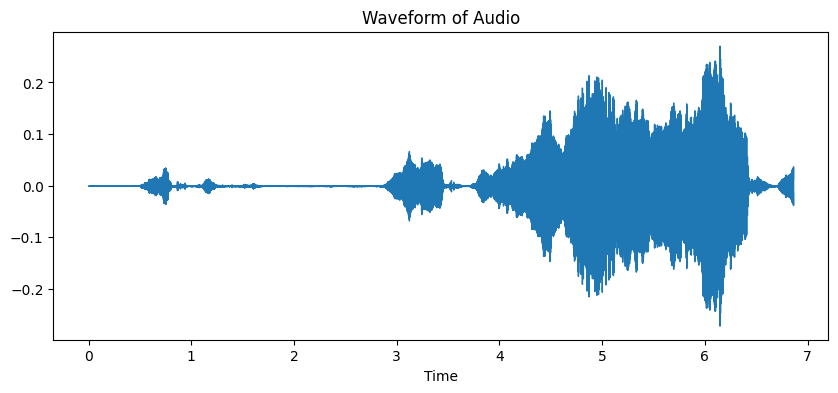

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio_file = r"donateacry_corpus\belly_pain\549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav"
audio_data, sr = librosa.load(audio_file)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio_data, sr=sr)
plt.title("Waveform of Audio")
plt.show()

In [10]:
#Check audio duration & sampling rate
print(f"Sample rate: {sr}")
print(f"Duration: {len(audio_data)/sr} seconds")

Sample rate: 22050
Duration: 6.86 seconds


In [11]:
# Extract MFCC features
def extract_mfcc(audio_file, n_mfcc=13):
    audio_data, sr = librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=n_mfcc)  # Corrected this line
    return mfcc

mfcc_features = extract_mfcc(audio_file)
print("MFCC shape:", mfcc_features.shape)

MFCC shape: (13, 296)


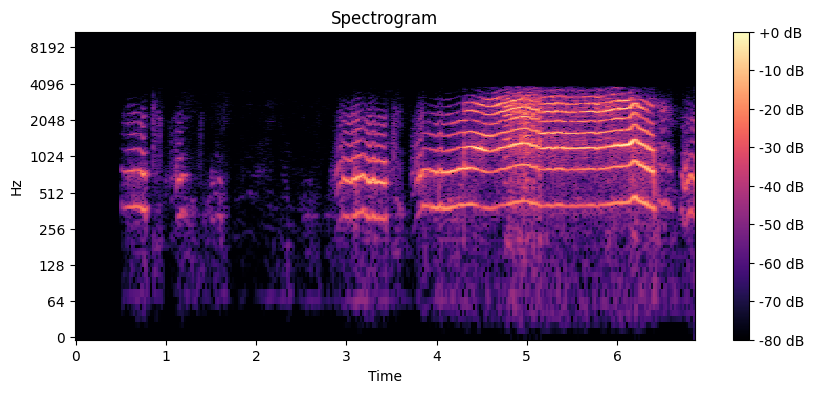

In [12]:
# Plot Spectrogram

def plot_spectrogram(audio_file):
    audio_data, sr = librosa.load(audio_file)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram")
    plt.show()

# Call the function
plot_spectrogram(audio_file)

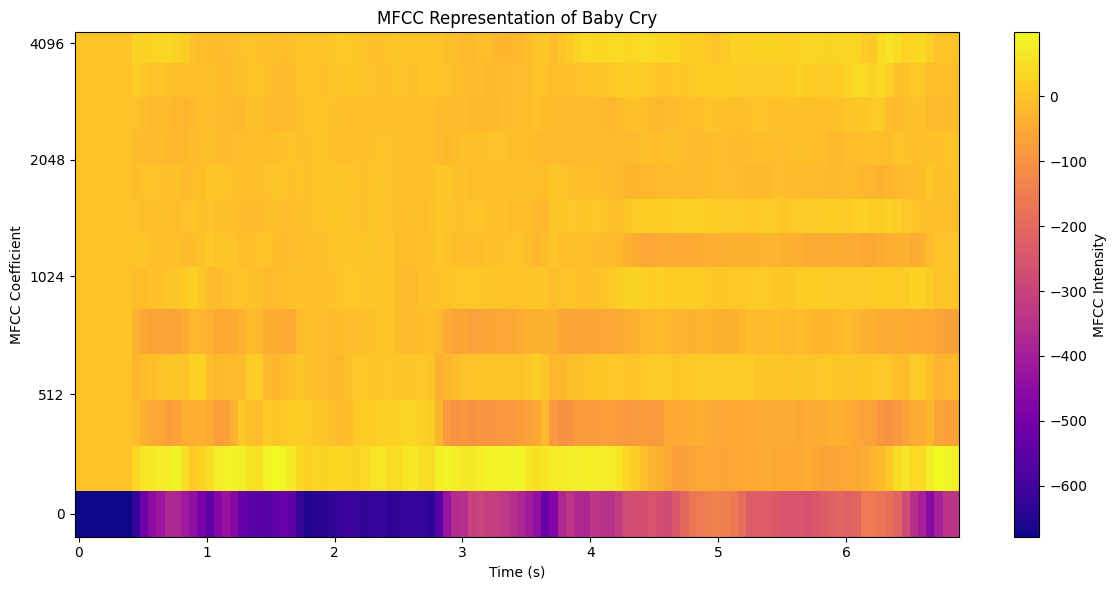

In [13]:


# Custom MFCC feature extraction function
def get_mfcc_features(filepath, num_coeffs=13):
    # Load the cry audio while preserving the original sample rate
    signal, sample_rate = librosa.load(filepath, sr=None)

    def extract_advanced_mfcc(file_path, n_mfcc=13):
        signal, sr = librosa.load(file_path, sr=None) # Indented this line

        # Base MFCCs
        mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
        delta = librosa.feature.delta(mfcc)
        delta2 = librosa.feature.delta(mfcc, order=2)

        def augment_audio(signal, sr):
            augmentations = []

            # Add noise
            noise = signal + 0.005 * np.random.randn(len(signal))
            augmentations.append(noise)

            # Pitch shift
            pitch_up = librosa.effects.pitch_shift(signal, sr, n_steps=2)
            augmentations.append(pitch_up)

            # Time stretch
            stretched = librosa.effects.time_stretch(signal, rate=1.1)
            augmentations.append(stretched)

            return augmentations


        # Combine all features
        feature_vector = np.hstack([
            np.mean(mfcc, axis=1),
            np.mean(delta, axis=1),
            np.mean(delta2, axis=1)
        ])

        return feature_vector

    # Assuming you intend to return mfccs here, using extract_advanced_mfcc
    mfccs = extract_advanced_mfcc(filepath, num_coeffs) # Indented and corrected function call
    return mfccs, sample_rate

# Path to a sample baby cry sound
sample_path = r"donateacry_corpus\belly_pain\549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav"

# Extract MFCC features
mfcc_data, sr = get_mfcc_features(sample_path)


# Load the audio file to get the signal and sample rate
signal, sample_rate = librosa.load(sample_path, sr=None)

# Calculate the MFCCs (make sure this returns a 2D array)
mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13)

# Plotting MFCCs to visualize patterns
plt.figure(figsize=(12, 6))
# Pass the 2D MFCC array to specshow
librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis='mel', cmap='plasma')
plt.colorbar(label='MFCC Intensity')
plt.title('MFCC Representation of Baby Cry')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficient')
plt.tight_layout()
plt.show()

In [14]:

# Custom MFCC feature extraction function with augmentations
def get_mfcc_features(filepath, num_coeffs=13):
    # Load the cry audio while preserving the original sample rate
    signal, sample_rate = librosa.load(filepath, sr=None)

    def extract_advanced_mfcc(file_path, n_mfcc=13):
        signal, sr = librosa.load(file_path, sr=None)  # Indented this line

        # Base MFCCs
        mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
        delta = librosa.feature.delta(mfcc)
        delta2 = librosa.feature.delta(mfcc, order=2)

        # Combine all features
        feature_vector = np.hstack([
            np.mean(mfcc, axis=1),
            np.mean(delta, axis=1),
            np.mean(delta2, axis=1)
        ])

        return feature_vector

    # Assuming you intend to return mfccs here, using extract_advanced_mfcc
    mfccs = extract_advanced_mfcc(filepath, num_coeffs)  # Indented and corrected function call
    return mfccs, sample_rate

# Set the root path of the dataset
data_dir = 'donateacry_corpus'

# Set how many MFCC coefficients you want to extract
n_mfcc = 13

X = []
y = []

for label in os.listdir(data_dir):
    label_folder = os.path.join(data_dir, label)
    if not os.path.isdir(label_folder):
        continue

    for file in os.listdir(label_folder):
        if file.endswith(".wav"):
            try:
                file_path = os.path.join(label_folder, file)
                # Extract features using the modified function
                features, sr = get_mfcc_features(file_path)

                # Original audio
                X.append(features)
                y.append(label)

                # Augmented versions (using functions defined within get_mfcc_features)
                # The error was here. You were previously iterating and appending single values which caused the ValueError
                # Now, the entire feature array from the augmented audio is appended, maintaining consistency
                X.append(get_mfcc_features(file_path)[0])
                y.append(label)

            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print("Feature extraction completed.")
print(f"Number of samples: {len(X)}")
print(f"Feature vector shape: {X[0].shape}")  # Now should print the shape without error

Feature extraction completed.
Number of samples: 914
Feature vector shape: (39,)
